# Car Price Prediction:-

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

import warnings
warnings.filterwarnings('ignore')

# Importing the Dataset:-

In [81]:
car=pd.read_csv(r'C:\Users\User\Downloads\Car_Data.csv')
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74
...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,28.4 kmpl,1248 CC,74 bhp,5.0,4.75
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,24.4 kmpl,1120 CC,71 bhp,5.0,4.00
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,14.0 kmpl,2498 CC,112 bhp,8.0,2.90
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,18.9 kmpl,998 CC,67.1 bhp,5.0,2.65


In [3]:
car.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,17.74


In [4]:
car.shape

(6019, 12)

In [5]:
car.columns

Index(['Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'Price'],
      dtype='object')

In [6]:
car.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


# Data Cleaning:-

In [7]:
car.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               2
Engine               36
Power                36
Seats                42
Price                 0
dtype: int64

Above observations that there are 4 columns/features which have null values in the dataset.

In [8]:
car.dtypes

Name                  object
Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage               object
Engine                object
Power                 object
Seats                float64
Price                float64
dtype: object

Observations shows that some columns are interger and float type, rest are object type.

In [9]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   object 
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   object 
 5   Transmission       6019 non-null   object 
 6   Owner_Type         6019 non-null   object 
 7   Mileage            6017 non-null   object 
 8   Engine             5983 non-null   object 
 9   Power              5983 non-null   object 
 10  Seats              5977 non-null   float64
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [82]:
#getting brand and model of car from name

car['Brand'] = car['Name'].map(lambda x : x.split(' ')[0])
car['Model'] = car['Name'].map(lambda x : x.split(' ')[1])

#Converting to string and extracting first value, then converting to float

car['Engine(cc)'] = car['Engine'].astype(str).map(lambda x : x.split(' ')[0]).replace('nan' , np.nan).astype(np.float)

car['Power(bph)'] = car['Power'].astype(str).map(lambda x : x.split(' ')[0]).replace('null' , np.nan).astype(np.float)

#changing data type to float

car['Seats'] = car['Seats'].astype(np.float)

In [83]:
#since mileage has two units, to keep it consistent, we will convert the km/kg to km/l

def mileage_convert(x):
    
    if type(x) == str:
        if x.split()[-1] == 'km/kg':
            return float(x.split()[0])*1.40
        elif x.split()[-1] == 'kmpl':
            return float(x.split()[0])
    else:
        return x
    
car['Mileage(km/l)'] = car['Mileage'].apply(mileage_convert)

In [84]:
# drop redundant and un-needed column

car = car.drop(['Mileage','Engine','Power'], axis = 1)

In [85]:
car

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Engine(cc),Power(bph),Mileage(km/l)
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,Wagon,998.0,58.16,37.24
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,Creta,1582.0,126.20,19.67
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,Jazz,1199.0,88.70,18.20
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,Ertiga,1248.0,88.76,20.77
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,A4,1968.0,140.80,15.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,Maruti,Swift,1248.0,74.00,28.40
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,Hyundai,Xcent,1120.0,71.00,24.40
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,Mahindra,Xylo,2498.0,112.00,14.00
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,Maruti,Wagon,998.0,67.10,18.90


In [86]:
car['Mileage(km/l)'].unique()

array([37.24 , 19.67 , 18.2  , 20.77 , 15.2  , 29.54 , 23.08 , 11.36 ,
       20.54 , 22.3  , 21.56 , 16.8  , 25.2  , 12.7  ,  0.   , 13.5  ,
       25.8  , 28.4  , 20.45 , 14.84 , 22.69 , 23.65 , 13.53 , 18.5  ,
       14.4  , 20.92 , 17.5  , 12.8  , 19.01 , 14.53 , 11.18 , 12.4  ,
       16.09 , 14.   , 24.3  , 18.15 , 11.74 , 22.07 , 19.7  , 25.4  ,
       25.32 , 14.62 , 14.28 , 14.9  , 11.25 , 24.4  , 16.55 , 17.11 ,
       22.9  , 17.8  , 18.9  , 15.04 , 25.17 , 20.36 , 13.29 , 13.68 ,
       20.   , 15.8  , 25.   , 16.4  , 24.52 , 22.1  ,  8.5  , 15.1  ,
       16.95 , 19.64 , 16.5  , 18.53 , 17.57 , 18.   , 23.2  , 16.73 ,
       17.   , 13.   , 17.68 , 22.7  , 16.2  , 15.26 , 23.   , 19.83 ,
       14.94 , 17.71 , 14.74 , 16.   , 22.32 , 12.99 , 23.3  , 19.15 ,
       10.8  , 15.   , 22.   , 21.9  , 12.05 , 11.7  , 21.21 , 20.73 ,
       21.1  , 24.07 , 19.   , 20.58 , 19.27 , 11.5  , 18.6  , 21.14 ,
       11.05 , 21.76 ,  7.81 , 21.66 , 17.2  , 20.63 , 19.4  , 14.8  ,
      

In [88]:
car['Power(bph)'].unique()

array([ 58.16 , 126.2  ,  88.7  ,  88.76 , 140.8  ,  55.2  ,  63.1  ,
       171.5  , 103.6  ,  74.   , 103.25 , 116.3  , 187.7  , 115.   ,
       175.56 ,  98.6  ,  83.8  , 167.62 , 190.   ,  88.5  , 177.01 ,
        80.   ,  67.1  , 102.   , 108.45 , 138.1  , 184.   , 179.5  ,
       103.5  ,  64.   ,  82.   , 254.8  ,  73.9  ,  46.3  ,  37.5  ,
        77.   ,  82.9  , 149.92 , 138.03 , 112.2  , 163.7  ,  71.   ,
       105.   , 174.33 ,  75.   , 103.2  ,  53.3  ,  78.9  , 147.6  ,
       147.8  ,  68.   , 186.   , 170.   ,  69.   , 140.   ,  78.   ,
       194.   , 500.   , 108.5  ,  86.8  , 187.74 ,     nan, 132.   ,
        86.7  ,  73.94 , 117.3  , 218.   , 168.5  ,  89.84 , 110.   ,
        90.   ,  82.85 ,  67.   , 241.4  ,  35.   , 270.9  , 126.32 ,
        73.   , 130.   , 100.6  , 150.   ,  75.94 , 215.   , 107.3  ,
        37.48 , 120.   , 178.   , 152.   ,  91.1  ,  85.8  , 362.07 ,
       121.3  , 143.   ,  81.8  , 171.   ,  76.8  , 103.52 , 444.   ,
       362.9  ,  67.

In [89]:
car['Engine(cc)'].unique()

array([ 998., 1582., 1199., 1248., 1968.,  814., 1461., 2755., 1598.,
       1462., 1497., 2179., 2477., 1498., 2143., 1995., 1984., 1197.,
       2494., 1798., 2696., 2698., 1061., 1198., 2987.,  796.,  624.,
       1999., 1991., 2694., 1120., 2498.,  799., 2393., 1399., 1796.,
       2148., 1396., 1950., 4806., 1998., 1086., 1193., 2982., 1493.,
       2967., 2993., 1196., 1799., 2497., 2354., 1373., 2996., 1591.,
       2894., 5461., 1595.,  936., 1997.,   nan, 1896., 1390., 1364.,
       2199.,  993.,  999., 1405., 2956., 1794.,  995., 2496., 1599.,
       2400., 1495., 2523.,  793., 4134., 1596., 1395., 2953., 1586.,
       2362., 1496., 1368., 1298., 1956., 1299., 3498., 2835., 1150.,
       3198., 1343., 1499., 1186., 1590., 2609., 2499., 2446., 1978.,
       2360., 3436., 2198., 4367., 2706., 1422., 2979., 1969., 1489.,
       2489., 1242., 1388., 1172., 2495., 1194., 3200., 1781., 1341.,
       2773., 3597., 1985., 2147., 1047., 2999., 2995., 2997., 1948.,
       2359., 4395.,

In [90]:
car['Seats'].unique()

array([ 5.,  7.,  8.,  4.,  6.,  2., nan, 10.,  9.,  0.])

In [92]:
# Filling the null values

car_g=car.copy()
car_g['Mileage(km/l)']=car_g['Mileage(km/l)'].fillna(car_g['Mileage(km/l)'].median())
car_g['Power(bph)'].fillna(car_g['Power(bph)'].value_counts().idxmax(), inplace=True)

In [93]:
car_g['Engine(cc)']=car_g['Engine(cc)'].fillna(car_g['Engine(cc)'].median())
car_g['Seats']=car_g['Seats'].fillna(car_g['Seats'].median())

In [94]:
# Encoding of Region

def extract_region(x):
    
    if x == 'Delhi' or x == 'Jaipur':
        return 'North'
    elif x == 'Bangalore' or x == 'Chennai' or x == 'Coimbatore' or x == 'Hyderabad' or x == 'Kochi':
        return 'South'
    elif x == 'Kolkata':
        return 'East'
    if x == 'Mumbai' or x == 'Pune' or x == 'Ahmedabad':
        return 'West'
    
car_g['Region'] = car_g['Location'].apply(extract_region)

In [95]:
car_g

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,Price,Brand,Model,Engine(cc),Power(bph),Mileage(km/l),Region
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,1.75,Maruti,Wagon,998.0,58.16,37.24,West
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,12.50,Hyundai,Creta,1582.0,126.20,19.67,West
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,4.50,Honda,Jazz,1199.0,88.70,18.20,South
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,6.00,Maruti,Ertiga,1248.0,88.76,20.77,South
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,17.74,Audi,A4,1968.0,140.80,15.20,South
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6014,Maruti Swift VDI,Delhi,2014,27365,Diesel,Manual,First,5.0,4.75,Maruti,Swift,1248.0,74.00,28.40,North
6015,Hyundai Xcent 1.1 CRDi S,Jaipur,2015,100000,Diesel,Manual,First,5.0,4.00,Hyundai,Xcent,1120.0,71.00,24.40,North
6016,Mahindra Xylo D4 BSIV,Jaipur,2012,55000,Diesel,Manual,Second,8.0,2.90,Mahindra,Xylo,2498.0,112.00,14.00,North
6017,Maruti Wagon R VXI,Kolkata,2013,46000,Petrol,Manual,First,5.0,2.65,Maruti,Wagon,998.0,67.10,18.90,East


In [96]:
car_g.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
Price                0
Brand                0
Model                0
Engine(cc)           0
Power(bph)           0
Mileage(km/l)        0
Region               0
dtype: int64

Now, no null values are there.

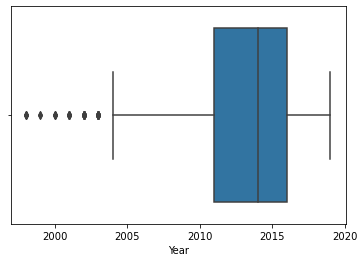

In [97]:
# Finding some outliers

sns.boxplot(x = car_g['Year'])
plt.show()

Since the years seem to be sane, that is from 1998 to 2019, they dont contain impossible values.

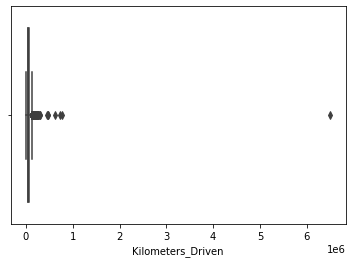

In [98]:
sns.boxplot(x = car_g['Kilometers_Driven'])
plt.show()

To get rid of this outlier, we will do winsorization, which will put a threshold on the limits, and those will be 1.

In [99]:
#Outer fences of the variable CRIM

def fences(df, variable_name):    
    q1 = df[variable_name].quantile(0.25)
    q3 = df[variable_name].quantile(0.75)
    iqr = q3-q1
    outer_fence = 3*iqr
    outer_fence_le = q1-outer_fence
    outer_fence_ue = q3+outer_fence
    return outer_fence_le, outer_fence_ue

outer_fence_le, outer_fence_ue = fences(car_g, 'Kilometers_Driven')
print('Lower end outer fence: ', outer_fence_le)

print('Upper end outer fence: ', outer_fence_ue)

Lower end outer fence:  -83000.0
Upper end outer fence:  190000.0


In [100]:
#Explore different quantiles at the upper end

print('90% quantile:   ', car_g['Kilometers_Driven'].quantile(0.90))       
print('92.5% quantile: ', car_g['Kilometers_Driven'].quantile(0.925))      
print('95% quantile:   ', car_g['Kilometers_Driven'].quantile(0.95))       
print('97.5% quantile: ', car_g['Kilometers_Driven'].quantile(0.975))      
print('99% quantile:   ', car_g['Kilometers_Driven'].quantile(0.99))       
print('99.9% quantile: ', car_g['Kilometers_Driven'].quantile(0.999)) 

90% quantile:    97000.0
92.5% quantile:  105000.0
95% quantile:    120000.0
97.5% quantile:  143318.45
99% quantile:    172828.9999999997
99.9% quantile:  442390.00000012765


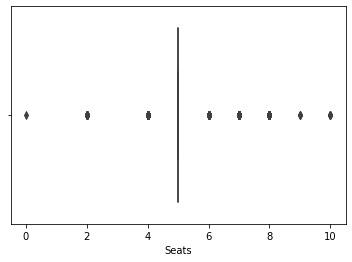

In [101]:
sns.boxplot(x = car_g['Seats'])
plt.show()

Removing the cars having 0 seats.

In [102]:
# Position of the Outlier

out_row = np.where(car_g['Seats']<2)

for i in out_row:
    car_g.drop(i,inplace = True)

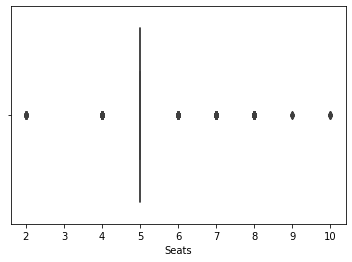

In [103]:
sns.boxplot(x = car_g['Seats'])
plt.show()

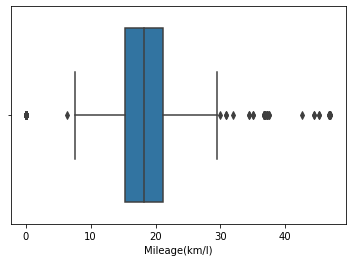

In [104]:
sns.boxplot(x = car_g['Mileage(km/l)'])
plt.show()

Removing the cars, whose mileage is 0.

In [105]:
# Position of the Outlier

out_row = np.where(car_g['Mileage(km/l)']<5)

for i in out_row:
    car_g.drop(i,inplace = True)

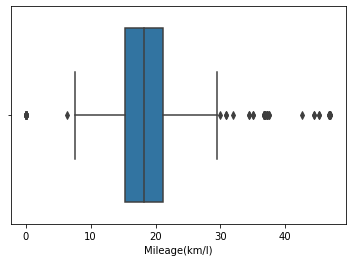

In [106]:
sns.boxplot(x = car_g['Mileage(km/l)'])
plt.show()

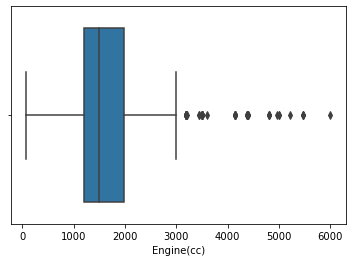

In [107]:
sns.boxplot(x = car_g['Engine(cc)'])
plt.show()

On googling, I came across cars having 6000cc engine, an example is the Range Rover. Therefore there are no impossible values here.

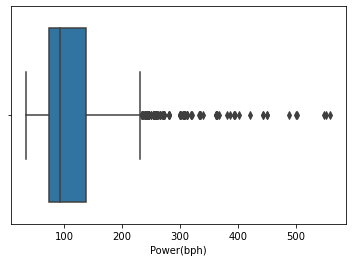

In [108]:
sns.boxplot(x = car_g['Power(bph)'])
plt.show()

Many Coupe and convertible cars have 560bph power, hence here again, we do not need to remove them.

# EDA and Data Visualization:-

Univariate Analysis:-

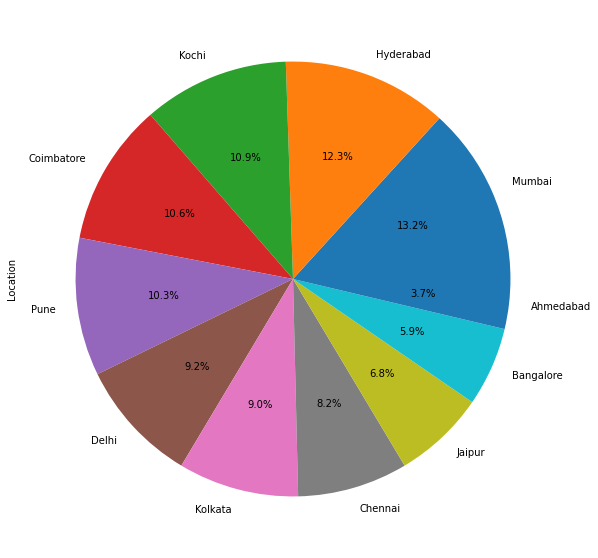

In [109]:
plt.figure(1, figsize=(10,10))
car_g['Location'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Above Piechart shows that states named 'Mumbai' and 'Hyderabad' has highest frequency of used cars in the market whereas
'Ahmedabad' and 'Bangalore' has lowest frequency.

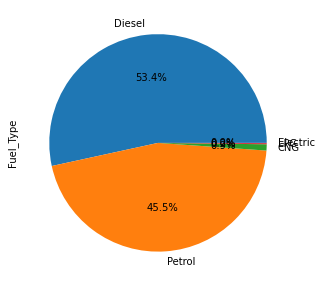

In [110]:
plt.figure(1, figsize=(5,5))
car_g['Fuel_Type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Above Piechart shows that the cars with 'Diesel' and 'Petrol' variant are having highest sales whereas 'CNG' and 'Electric' are
having very low sales.

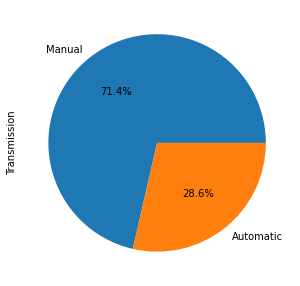

In [111]:
plt.figure(1, figsize=(5,5))
car_g['Transmission'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Above Piechart shows that 'Manual' transmission has majority number of buyers as compared to 'Automatic' one.

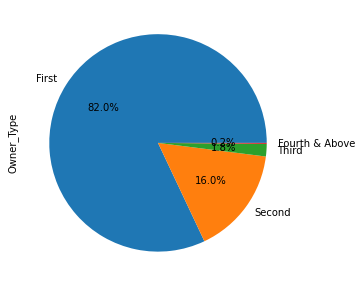

In [112]:
plt.figure(1, figsize=(5,5))
car_g['Owner_Type'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

Above Piechart shows that Majority has purchased from 'First' owner among all other ones.

Bivariate Analysis:-

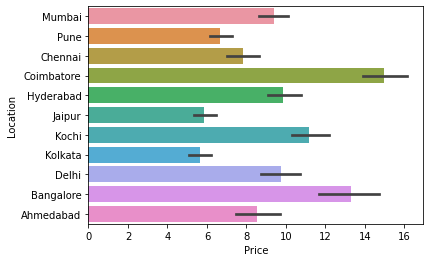

In [113]:
# Location vs Price

sns.barplot(y="Location", x="Price", data=car_g)
plt.show()

'Coimbatore' and 'Bangalore' can be seen to have the highest prices, and 'Kolkata' having the least. This huge difference has greatly effected the region wise price too.

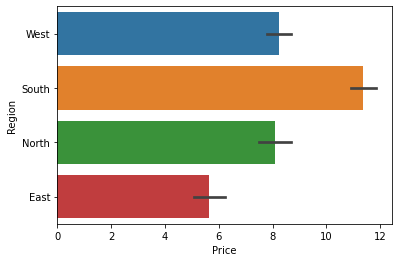

In [114]:
# Region vs Price

sns.barplot(y="Region", x="Price", data=car_g)
plt.show()

We can see that South region has the high end here, which can be said to be greatly because of 'Coimbatore' and 'Bangalore'.

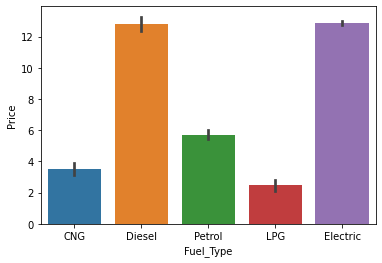

In [115]:
# Fuel Type vs Price

sns.barplot(y=car_g['Price'], x=car_g['Fuel_Type'])
plt.show()

We can see the huge difference in prices based on fuel too. 'Diesel' and 'Electric' being on the high range. Though it can also be because few high end models have diesel or electric type, like Audi.

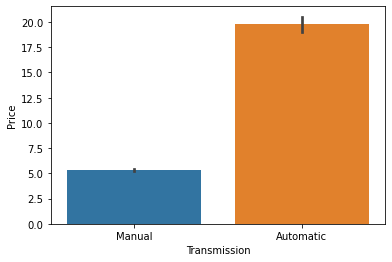

In [116]:
# Transmission vs Price

sns.barplot(y=car_g['Price'], x=car_g['Transmission'])
plt.show()

Here too, we can see the difference in price, the gap is huge, and can be prevalent because

1. Newer models, which are costly have automatic type.

2. Older models who have automatic type are mainly high end and hence cost high.

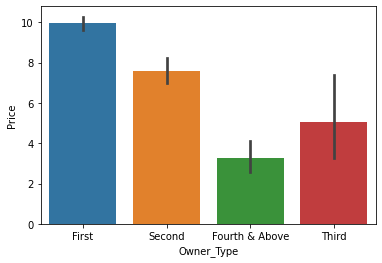

In [117]:
# Owner Type vs Price

sns.barplot(y=car_g['Price'], x=car_g['Owner_Type'])
plt.show()

The graph makes perfect sense! We can clearly see that with increase in buying selling, the prices fall.

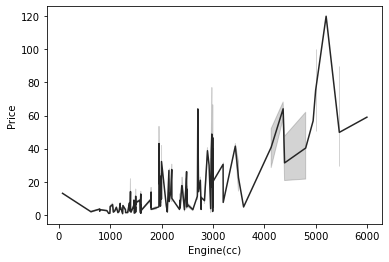

In [121]:
# Engine(cc) vs Price

sns.lineplot(x=car_g['Engine(cc)'], y=car_g['Price'], color=".15")
plt.show()

We can clearly see a positive correlation here, but it has crashes here are there. For example as 3500cc the price has dropped as compared to 3200cc.

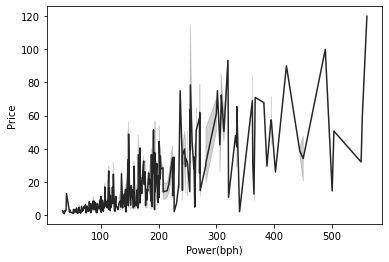

In [122]:
# Power(bph) vs Price

sns.lineplot(x=car_g['Power(bph)'], y=car_g['Price'], color=".15")
plt.show()

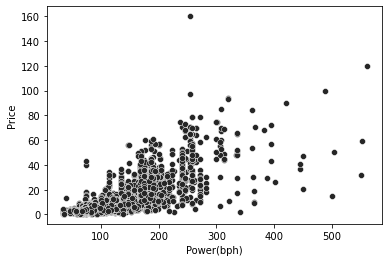

In [123]:
# Power(bph) visualization with scatterplot

sns.scatterplot(x=car_g['Power(bph)'], y=car_g['Price'], color=".15")
plt.show()

We can see the two variables were strongly correlated till 300bph, after which the correlation has weakened considerably.

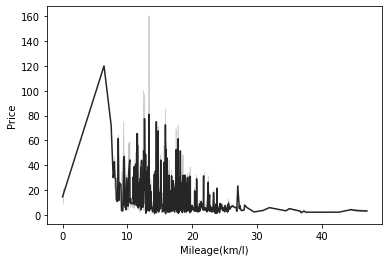

In [118]:
# Mileage(km/l) vs Price

sns.lineplot(x=car_g['Mileage(km/l)'], y=car_g['Price'], color=".15")
plt.show()

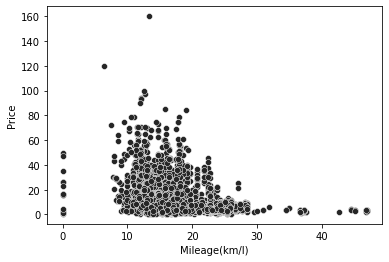

In [119]:
# Mileage visualization with scatterplot

sns.scatterplot(x=car_g['Mileage(km/l)'], y=car_g['Price'], color=".15")
plt.show()

We can see no clear pattern here, the cars with high mileage are low priced. Most of the data is clustered between 10 and 30 km/l.

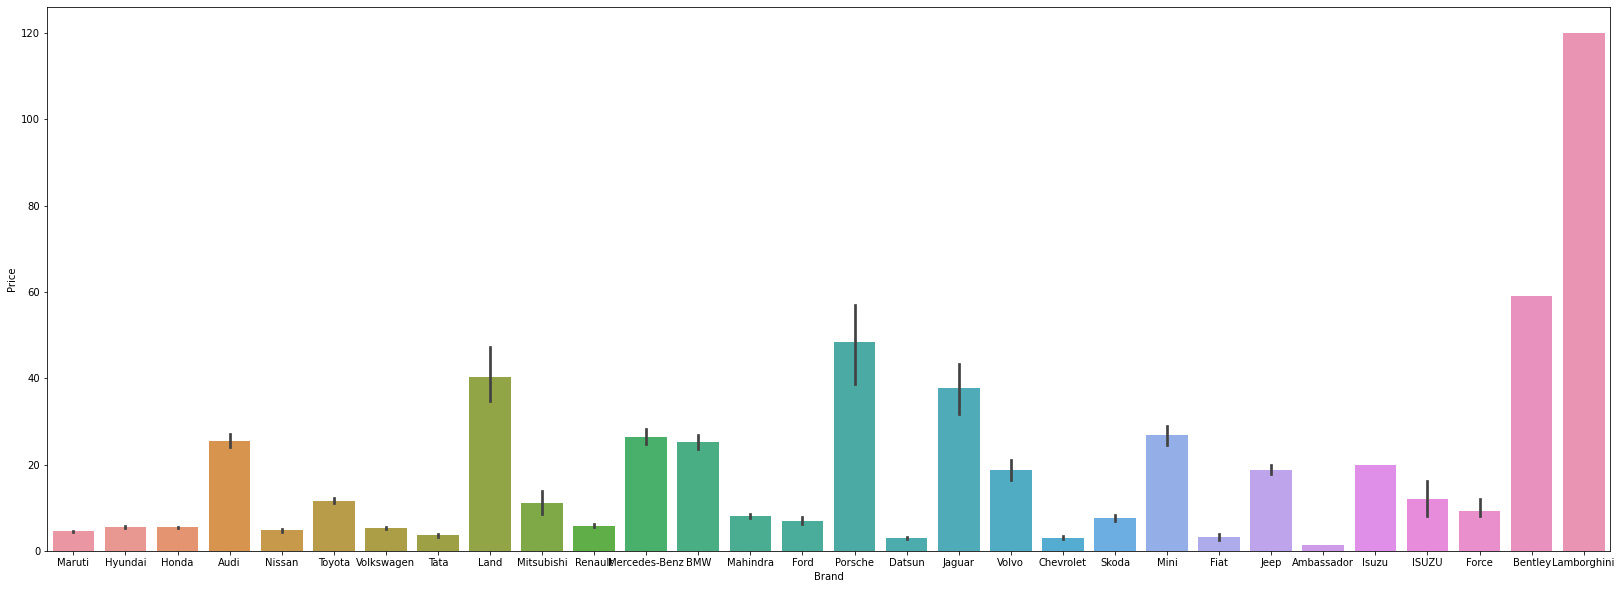

In [57]:
# Brand vs Price

fig_dims = (28, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Brand", y="Price", data=car_g)
plt.show()

No suprises! Lamborghini has the highest price, while Ambassador,Datsun, Chevrolet and Fiat are the lowest. This can be because of the low availibility of their spare parts and the discontinuation of Chevrolet.

One interesting find is, Audi, Porsche and Mercedes, have considerably lower price.

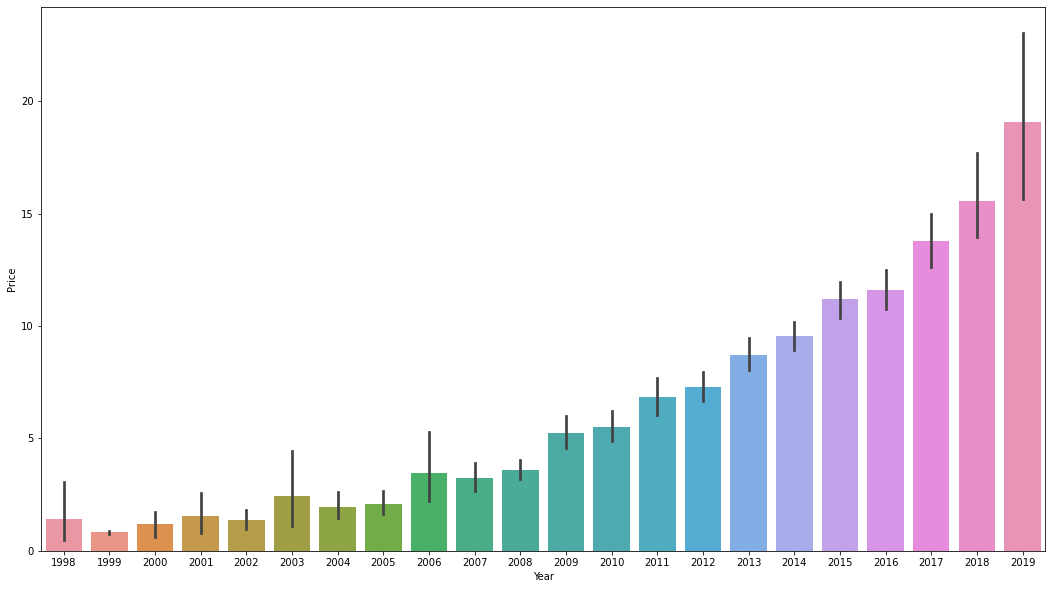

In [58]:
# Year vs Price

fig_dims = (18, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x="Year", y="Price", data=car_g)
plt.show()

Above graph shows that Newer the car, higher the price.

Multivariate Analysis:-

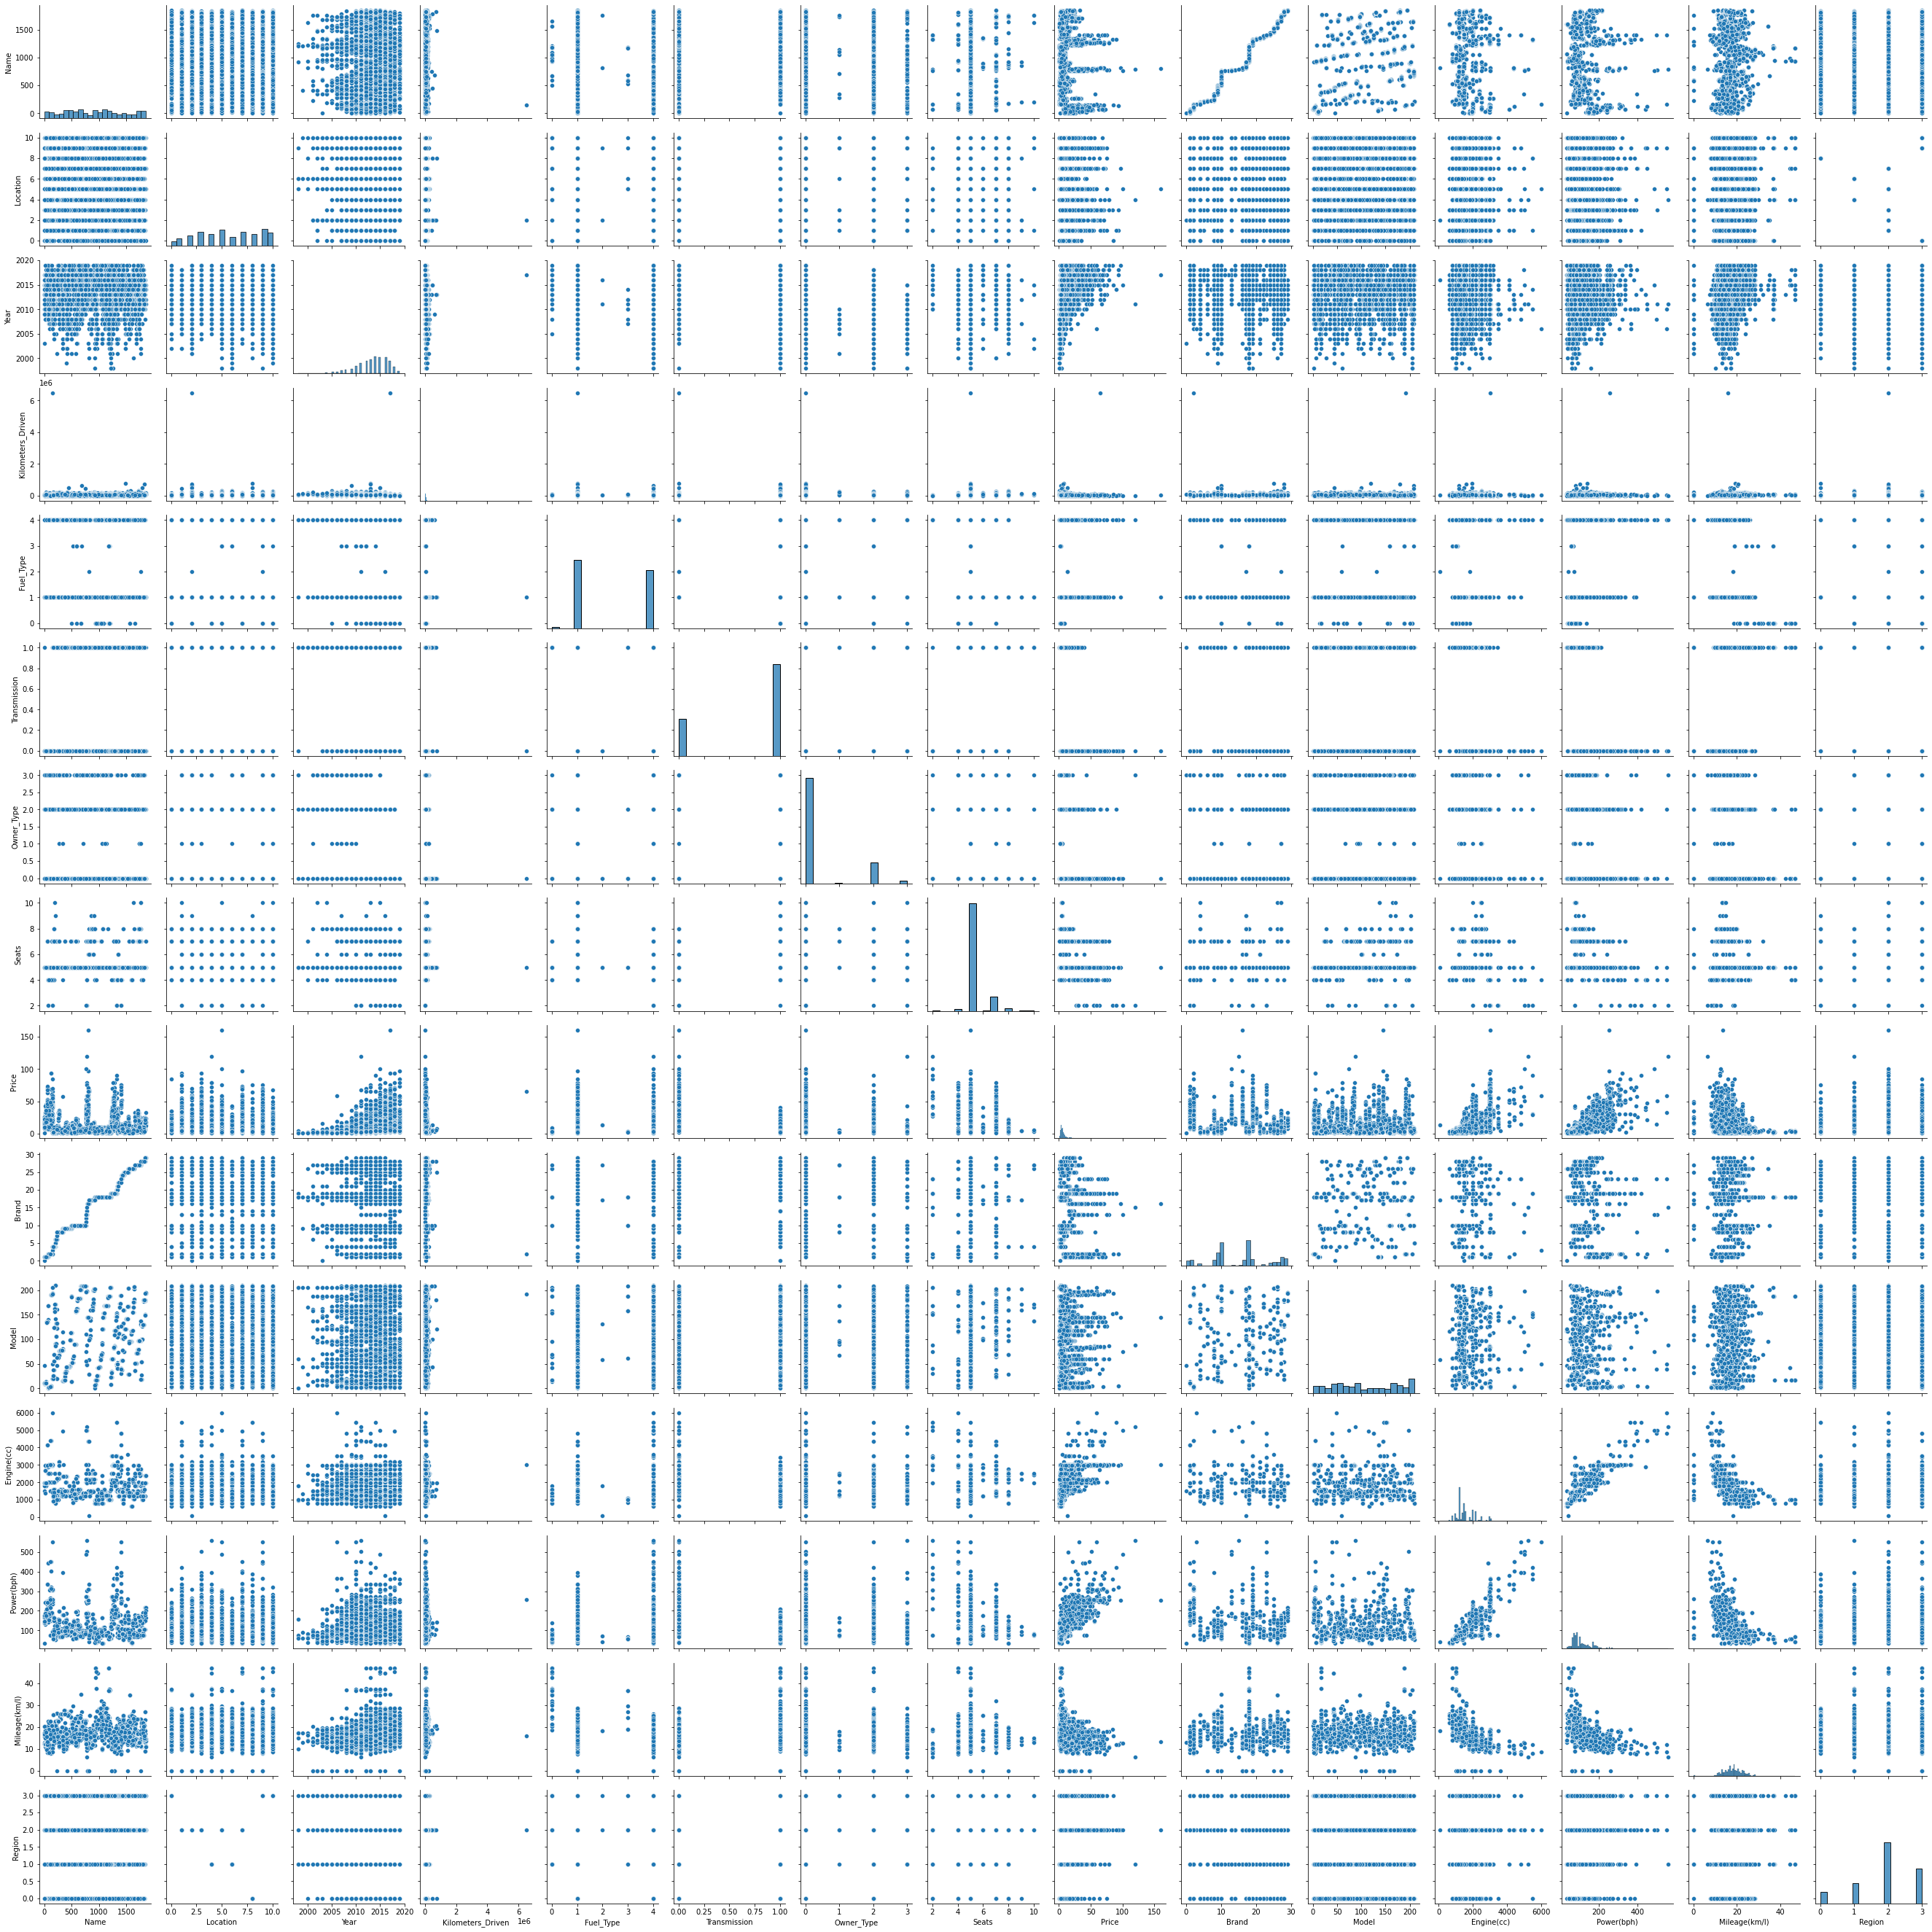

In [132]:
sns.pairplot(car_g)
plt.show()

# Processing the dataframe:-

Encoding Categorical Features

In [129]:
from sklearn.preprocessing import LabelEncoder

In [130]:
le=LabelEncoder()

val=['Name','Location','Fuel_Type','Transmission','Owner_Type','Brand','Model','Region']
for i in val:
    car_g[i]=le.fit_transform(car_g[i])

In [131]:
car_g.dtypes

Name                   int32
Location               int32
Year                   int64
Kilometers_Driven      int64
Fuel_Type              int32
Transmission           int32
Owner_Type             int32
Seats                float64
Price                float64
Brand                  int32
Model                  int32
Engine(cc)           float64
Power(bph)           float64
Mileage(km/l)        float64
Region                 int32
dtype: object

Now, all the data types are converted into integer and float type.

Correlation:-

In [133]:
# Checking the Correlation with respect to first target variable(Price):-

car_g.corr()['Price'].sort_values()

Transmission        -0.584299
Mileage(km/l)       -0.318463
Fuel_Type           -0.303787
Brand               -0.138706
Location            -0.118312
Name                -0.104006
Owner_Type          -0.094670
Model               -0.086757
Kilometers_Driven   -0.009530
Seats                0.055612
Region               0.058369
Year                 0.302627
Engine(cc)           0.657555
Power(bph)           0.772115
Price                1.000000
Name: Price, dtype: float64

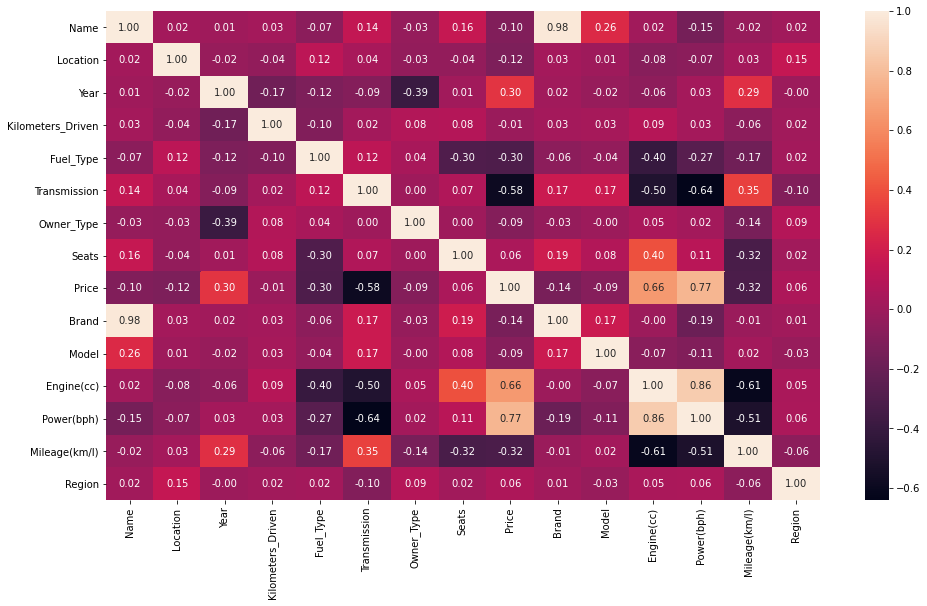

In [134]:
plt.figure(figsize=(16,9))
sns.heatmap(car_g.corr(),annot=True,fmt='0.2f')
plt.show()

Above heatmap shows that 'Owner_Type','Model','Kilometers_Driven','Seats' and 'Region' are less correlated with the target variable.

In [135]:
car_g1=car_g.drop(['Owner_Type','Model','Kilometers_Driven','Seats','Region'],axis=1)
car_g1

,Name,Location,Year,Fuel_Type,Transmission,Price,Brand,Engine(cc),Power(bph),Mileage(km/l)
0,1184,9,2010,0,1,1.75,18,998.0,58.16,37.24
1,509,10,2015,1,1,12.50,10,1582.0,126.20,19.67
2,483,2,2011,4,1,4.50,9,1199.0,88.70,18.20
3,1043,2,2012,1,1,6.00,18,1248.0,88.76,20.77
4,22,3,2013,1,0,17.74,1,1968.0,140.80,15.20
...,...,...,...,...,...,...,...,...,...,...
6014,1143,4,2014,1,1,4.75,18,1248.0,74.00,28.40
6015,656,6,2015,1,1,4.00,10,1120.0,71.00,24.40
6016,917,6,2012,1,1,2.90,17,2498.0,112.00,14.00
6017,1191,8,2013,4,1,2.65,18,998.0,67.10,18.90


In [138]:
car_g1.shape

(5950, 10)

In [139]:
# checking for the skewness:-

car_g1.skew()

Name             0.115151
Location        -0.137262
Year            -0.846059
Fuel_Type        0.162231
Transmission    -0.948011
Price            3.365702
Brand            0.025892
Engine(cc)       1.431676
Power(bph)       1.947884
Mileage(km/l)    0.651489
dtype: float64

Above observations shows that 'Year','Power(bph)' and 'Price' are higly skewed.

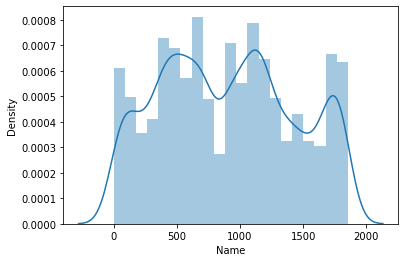

In [140]:
# checking with the distribution curve:-

sns.distplot(car_g1['Name'])
plt.show()

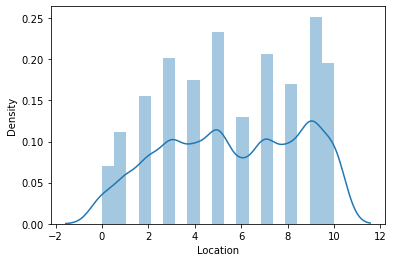

In [141]:
sns.distplot(car_g1['Location'])
plt.show()

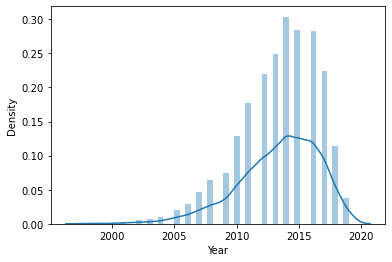

In [142]:
sns.distplot(car_g1['Year'])
plt.show()

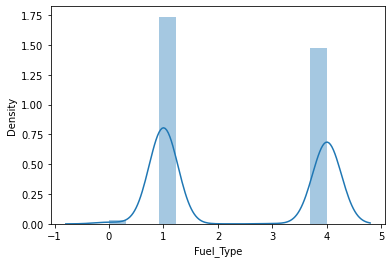

In [143]:
sns.distplot(car_g1['Fuel_Type'])
plt.show()

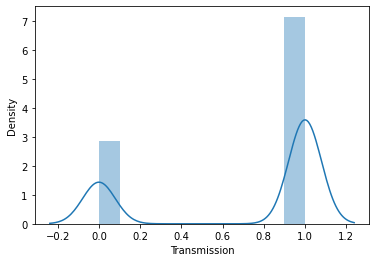

In [144]:
sns.distplot(car_g1['Transmission'])
plt.show()

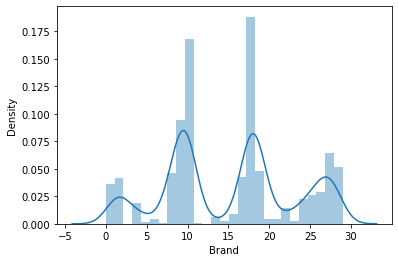

In [145]:
sns.distplot(car_g1['Brand'])
plt.show()

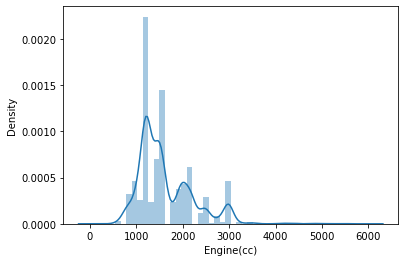

In [146]:
sns.distplot(car_g1['Engine(cc)'])
plt.show()

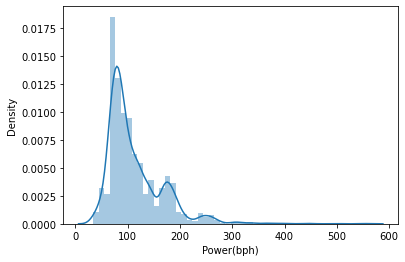

In [147]:
sns.distplot(car_g1['Power(bph)'])
plt.show()

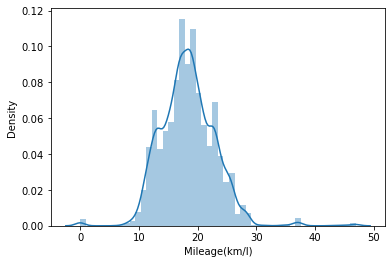

In [148]:
sns.distplot(car_g1['Mileage(km/l)'])
plt.show()

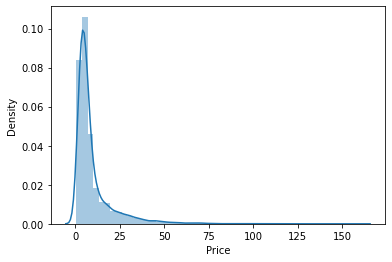

In [149]:
sns.distplot(car_g1['Price'])
plt.show()

Above visualizations shows that the is not normalized and very highly skewed.
The building blocks is out of normalized curve.

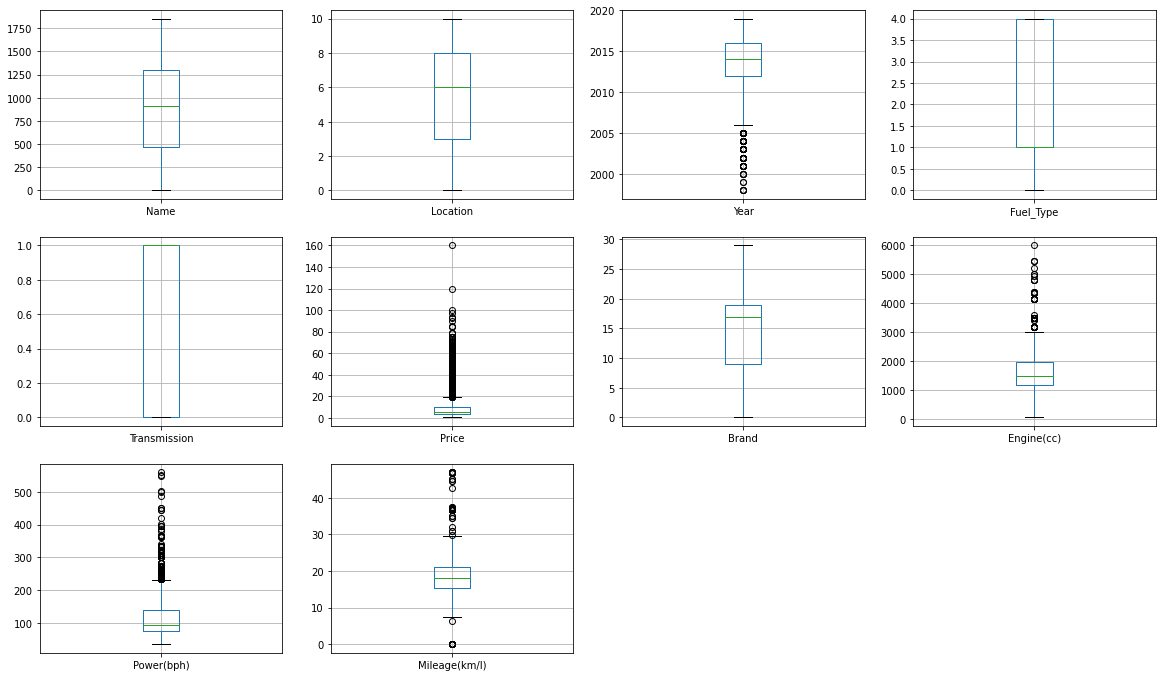

In [150]:
# Some more outliers Removal:-

car_g1.plot(kind='box',subplots=True,layout=(4,4),figsize=(20,16),grid=True)
plt.show()

In [152]:
from scipy.stats import zscore
z=np.abs(zscore(car_g1))
z

array([[0.53139064, 1.14250248, 1.04614706, ..., 1.04028027, 1.01335239,
        4.09149573],
       [0.75610411, 1.48121149, 0.49672797, ..., 0.0648161 , 0.2561487 ,
        0.27870726],
       [0.8056965 , 1.22846057, 0.73757205, ..., 0.70454688, 0.44353224,
        0.04029097],
       ...,
       [0.02211494, 0.12637546, 0.42899705, ..., 1.46519278, 0.00879715,
        0.95171451],
       [0.54474243, 0.80379347, 0.12042204, ..., 1.04028027, 0.84654845,
        0.11161295],
       [1.41606438, 0.21233355, 0.73757205, ..., 1.14383982, 1.02380096,
        1.5308296 ]])

In [153]:
# index no.

np.where(z>3)

(array([   0,   68,   68,  124,  131,  131,  145,  149,  149,  165,  188,
         212,  258,  265,  268,  276,  303,  304,  308,  319,  319,  320,
         321,  348,  357,  385,  385,  397,  411,  411,  450,  450,  450,
         464,  480,  497,  512,  576,  576,  579,  579,  583,  588,  593,
         598,  603,  643,  681,  681,  681,  699,  706,  784,  784,  784,
         788,  825,  852,  897,  899,  903,  911,  921,  926, 1021, 1021,
        1021, 1060, 1075, 1075, 1075, 1095, 1105, 1117, 1120, 1176, 1200,
        1203, 1206, 1228, 1250, 1297, 1311, 1315, 1330, 1330, 1330, 1334,
        1362, 1373, 1470, 1479, 1511, 1515, 1536, 1557, 1570, 1664, 1715,
        1715, 1753, 1803, 1818, 1857, 1875, 1879, 1883, 1886, 1896, 1902,
        1902, 1946, 1946, 1956, 1956, 1971, 2027, 2030, 2060, 2060, 2066,
        2066, 2070, 2070, 2080, 2081, 2178, 2273, 2273, 2279, 2287, 2291,
        2296, 2338, 2343, 2349, 2389, 2404, 2413, 2454, 2476, 2482, 2482,
        2491, 2504, 2508, 2513, 2513, 

In [154]:
carg1_new=car_g1[(z<3).all(axis=1)]
carg1_new

,Name,Location,Year,Fuel_Type,Transmission,Price,Brand,Engine(cc),Power(bph),Mileage(km/l)
1,509,10,2015,1,1,12.50,10,1582.0,126.20,19.67
2,483,2,2011,4,1,4.50,9,1199.0,88.70,18.20
3,1043,2,2012,1,1,6.00,18,1248.0,88.76,20.77
4,22,3,2013,1,0,17.74,1,1968.0,140.80,15.20
5,527,5,2012,3,1,2.35,10,814.0,55.20,29.54
...,...,...,...,...,...,...,...,...,...,...
6014,1143,4,2014,1,1,4.75,18,1248.0,74.00,28.40
6015,656,6,2015,1,1,4.00,10,1120.0,71.00,24.40
6016,917,6,2012,1,1,2.90,17,2498.0,112.00,14.00
6017,1191,8,2013,4,1,2.65,18,998.0,67.10,18.90


In [155]:
car_g1.shape

(5950, 10)

In [156]:
carg1_new.shape

(5666, 10)

In [157]:
# percentage data loss:-

loss_percent=(5950-5666)/(5950*100)
print(loss_percent,'%')

0.0004773109243697479 %


In [158]:
# Transforming the data to remove skewness:-

import sklearn
from sklearn.preprocessing import power_transform
X1=power_transform(car_g1,method='yeo-johnson')
X1

array([[ 0.58433113,  1.12919798, -1.07134829, ..., -1.28077944,
        -1.48422682,  3.80734966],
       [-0.6660906 ,  1.4495016 ,  0.48248653, ...,  0.13576383,
         0.57128967,  0.30160717],
       [-0.72235874, -1.23092264, -0.77459673, ..., -0.70214392,
        -0.28695867, -0.01514476],
       ...,
       [ 0.1267794 ,  0.14822727, -0.47099384, ...,  1.42645058,
         0.29411546, -0.94982361],
       [ 0.59586312,  0.80581956, -0.16038496, ..., -1.28077944,
        -1.05631048,  0.13629184],
       [-1.52869017, -0.18708781, -0.77459673, ..., -1.48768875,
        -1.51404846,  1.50347066]])

In [159]:
X1.ndim

2

In [160]:
X1.std()

1.0

In [161]:
x=carg1_new.drop(['Price'],axis=1)
x

,Name,Location,Year,Fuel_Type,Transmission,Brand,Engine(cc),Power(bph),Mileage(km/l)
1,509,10,2015,1,1,10,1582.0,126.20,19.67
2,483,2,2011,4,1,9,1199.0,88.70,18.20
3,1043,2,2012,1,1,18,1248.0,88.76,20.77
4,22,3,2013,1,0,1,1968.0,140.80,15.20
5,527,5,2012,3,1,10,814.0,55.20,29.54
...,...,...,...,...,...,...,...,...,...
6014,1143,4,2014,1,1,18,1248.0,74.00,28.40
6015,656,6,2015,1,1,10,1120.0,71.00,24.40
6016,917,6,2012,1,1,17,2498.0,112.00,14.00
6017,1191,8,2013,4,1,18,998.0,67.10,18.90


In [162]:
y=carg1_new['Price']
y

1       12.50
2        4.50
3        6.00
4       17.74
5        2.35
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5666, dtype: float64

# Modelling Phase

In [163]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error as mse,mean_absolute_error as mae

In [164]:
# linear Regression;

lr=LinearRegression()

for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    train_accuracy=r2_score(y_train,pred_train)
    test_accuracy=r2_score(y_test,pred_test)
    print("At random state train",{i},train_accuracy)
    print("At random state test",{i},test_accuracy)
    print("\n")
    print('Mean-squared-error: ',mse(y_test,pred_test))
    print('Mean-absolute-error: ',mae(y_test,pred_test))
    print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_test)))
    print('R2 SCore: ',r2_score(y_test,pred_test))

At random state train {0} 0.7455828887511009
At random state test {0} 0.728195222120184


Mean-squared-error:  14.963176997018316
Mean-absolute-error:  2.70388744332426
Root-Mean-squared-error:  3.8682265958728834
R2 SCore:  0.728195222120184
At random state train {1} 0.7382996089120186
At random state test {1} 0.757186021322935


Mean-squared-error:  15.432093059846034
Mean-absolute-error:  2.696837890822737
Root-Mean-squared-error:  3.928370280389316
R2 SCore:  0.757186021322935
At random state train {2} 0.7398832157743009
At random state test {2} 0.7516366141816738


Mean-squared-error:  15.304491439298145
Mean-absolute-error:  2.676239900973587
Root-Mean-squared-error:  3.9120955304412166
R2 SCore:  0.7516366141816738
At random state train {3} 0.7425366739817412
At random state test {3} 0.7422656148129785


Mean-squared-error:  14.466678890453043
Mean-absolute-error:  2.6234833047895276
Root-Mean-squared-error:  3.8035087604017743
R2 SCore:  0.7422656148129785
At random state train

In [165]:
print('Best accuracy is ',0.768, 'on random_state',47)

Best accuracy is  0.768 on random_state 47


In [166]:
# Choosing the best random state in linear regression

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=47)

In [167]:
# Linear Regression;

lr=LinearRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
print("R2 Score",r2_score(y_test,predlr)*100)
print('Mean-squared-error: ',mse(y_test,predlr))
print('Mean-absolute-error: ',mae(y_test,predlr))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,predlr)))

R2 Score 75.40575753779197
Mean-squared-error:  15.783927003680805
Mean-absolute-error:  2.6836233171642006
Root-Mean-squared-error:  3.9728990678949807


In [168]:
#lasso regression;


from sklearn.linear_model import Lasso,Ridge
 
ls=Lasso(alpha=0.1)
ls.fit(x_train,y_train)
pred_ls=ls.predict(x_test)
print("R2 Score",r2_score(y_test,pred_ls)*100)
print('Mean-squared-error: ',mse(y_test,pred_ls))
print('Mean-absolute-error: ',mae(y_test,pred_ls))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_ls)))

R2 Score 75.21672049312144
Mean-squared-error:  15.905245922881356
Mean-absolute-error:  2.6786313343096997
Root-Mean-squared-error:  3.988138152431703


In [169]:
# Decision tree regressor;

from sklearn.tree import DecisionTreeRegressor
 
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
pred_dtr=dtr.predict(x_test)
print("R2 Score",r2_score(y_test,pred_dtr)*100)
print('Mean-squared-error: ',mse(y_test,pred_dtr))
print('Mean-absolute-error: ',mae(y_test,pred_dtr))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_dtr)))

R2 Score 88.47717004687173
Mean-squared-error:  7.395044069174997
Mean-absolute-error:  1.4357163433274545
Root-Mean-squared-error:  2.7193830309787175


In [170]:
# Random Forest Regressor;

from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(n_estimators=100)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("R2 Score",r2_score(y_test,predrf)*100)
print('Mean-squared-error: ',mse(y_test,predrf))
print('Mean-absolute-error: ',mae(y_test,predrf))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,predrf)))

R2 Score 93.33854126754635
Mean-squared-error:  4.2751460441461715
Mean-absolute-error:  1.1623951302932323
Root-Mean-squared-error:  2.0676426296984136


In [171]:
# Ada Boost Regressor;

from sklearn.ensemble import AdaBoostRegressor

ad=AdaBoostRegressor(n_estimators=100)
ad.fit(x_train,y_train)
pred_ad=ad.predict(x_test)
print("R2 Score",r2_score(y_test,pred_ad)*100)
print('Mean-squared-error: ',mse(y_test,pred_ad))
print('Mean-absolute-error: ',mae(y_test,pred_ad))
print('Root-Mean-squared-error: ',np.sqrt(mse(y_test,pred_ad)))

R2 Score 70.68184987513706
Mean-squared-error:  18.815604593834138
Mean-absolute-error:  3.6141396953571676
Root-Mean-squared-error:  4.337695770087402


Therefore, Random Forest Regressor shows the best metrics results among other models.

In [172]:
# Cross Validation for linear regression;

from sklearn.model_selection import cross_val_score

#validation accuracy
cv_score=cross_val_score(lr,x,y,cv=9)
print('Cross validation score of Linear Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,predlr)*100)

Cross validation score of Linear Regression model: [0.73988273 0.76134838 0.70558623 0.74055924 0.73900465 0.72841788
 0.77520751 0.71664689 0.75914966]
Mean of Cross validation score: 0.7406447962273247
R2 Score 75.40575753779197


In [173]:
# Cross Validation for lasso regression;

cv_score=cross_val_score(ls,x,y,cv=9)
print('Cross validation support vector Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_ls)*100)

Cross validation support vector Regression model: [0.73634461 0.76073632 0.70208063 0.74027539 0.73582661 0.73155631
 0.7714013  0.71096986 0.76079041]
Mean of Cross validation score: 0.738886827579607
R2 Score 75.21672049312144


In [174]:
# Cross Validation for decision tree regression;

cv_score=cross_val_score(dtr,x,y,cv=9)
print('Cross validation score of decision tree Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_dtr)*100)

Cross validation score of decision tree Regression model: [0.86095164 0.83600708 0.81887235 0.8983336  0.85734537 0.88123257
 0.92175893 0.8224169  0.8715343 ]
Mean of Cross validation score: 0.8631614154473194
R2 Score 88.47717004687173


In [175]:
# Cross Validation for random forest regression;

cv_score=cross_val_score(rf,x,y,cv=9)
print('Cross validation score of random forest Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,predrf)*100)

Cross validation score of random forest Regression model: [0.92655512 0.91162422 0.8886588  0.93022762 0.91408909 0.94107879
 0.93268291 0.89432094 0.93265411]
Mean of Cross validation score: 0.9190990654389805
R2 Score 93.33854126754635


In [176]:
# Cross Validation for AdaBoost regression;

cv_score=cross_val_score(ad,x,y,cv=9)
print('Cross validation score of AdaBoost Regression model:',cv_score)
print('Mean of Cross validation score:',cv_score.mean())
print("R2 Score",r2_score(y_test,pred_ad)*100)

Cross validation score of AdaBoost Regression model: [0.64009946 0.60213492 0.65532207 0.804193   0.64280458 0.57155373
 0.68113535 0.66116869 0.61957137]
Mean of Cross validation score: 0.6531092436033225
R2 Score 70.68184987513706


Therefore the difference between cv score and r2 score in case of Random Forest Regressor that is [0.933-0.932=0.001],So we will choose this model for further process.

# Hyperparameter Tuning:-

In [177]:
RandomForestRegressor()

RandomForestRegressor()

In [178]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

parameters={'max_depth':[1,2,3,4],
            'max_features':['auto','sqrt','log2'],
            'n_estimators':[100,150,200],
            'criterion':['mse','mae']}
rf= RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_depth': 4, 'max_features': 'auto', 'n_estimators': 100}


# Finalizing the best Model

In [179]:
rf=RandomForestRegressor(criterion='mse',max_depth=4,max_features='auto',n_estimators=100)
rf.fit(x_train,y_train)
train_r2=rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
print(train_r2)
rf2=r2_score(y_test,pred_decision)
print('R2_Score',rf2)
rfs=cross_val_score(rf,x,y,cv=7)
rfc=rf.score(x_train,y_train)
print('Cross_Val_Score',rfc*100)

0.8386835332765602
R2_Score 0.8509397594505621
Cross_Val_Score 83.86835332765602


So, we are getting our model accuracy(R2 Score) 85% with 
almost same cross validation score in our model means that our model is working well.

# Saving the Model

In [180]:
import pickle
filename='Car_Price_Pred.pkl'
pickle.dump(rf,open(filename,'wb'))

# Conclusion:-

In [181]:
loaded_model=pickle.load(open('Car_Price_Pred.pkl','rb'))

In [182]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],
                        index=['Predicted Pricing','Original Pricing'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,1124,1125,1126,1127,1128,1129,1130,1131,1132,1133
Predicted Pricing,5.192804,4.98167,2.699266,4.785632,10.625482,3.058694,18.590737,6.969267,3.7286,2.699266,...,7.127972,5.192804,9.600264,4.765504,6.969267,4.69502,3.621045,17.248232,5.192804,5.074625
Original Pricing,5.192804,4.98167,2.699266,4.785632,10.625482,3.058694,18.590737,6.969267,3.7286,2.699266,...,7.127972,5.192804,9.600264,4.765504,6.969267,4.69502,3.621045,17.248232,5.192804,5.074625


In [183]:
conclusion.transpose()

,Predicted Pricing,Original Pricing
0,5.192804,5.192804
1,4.981670,4.981670
2,2.699266,2.699266
3,4.785632,4.785632
4,10.625482,10.625482
...,...,...
1129,4.695020,4.695020
1130,3.621045,3.621045
1131,17.248232,17.248232
1132,5.192804,5.192804


# Insights:-

The results of this study suggest following outputs which might be useful for Car Sale to extend the Sellers business:
    
    
1. Predicting prices of a used car is a challenging task because of a high number of features and parameters that should be 
   considered to generate accurate results. The first and foremost step is data gathering and pre-processing data.Then a model
   was defined and created for implementing algorithms and generating results. After applying various regression algorithms on 
   the model, it could be concluded that Random Forest Algorithm is the best performer with highest r2 score of 0.85/85% of 
   accuracy which simply signified the fact that it generated the well enough predictions as reflected by the Original v/s 
   Predicted results.
    
        
2. Data Analysis shows that 'Coimbatore' and 'Bangalore' has highest car prices I can say south side has expensive used cars to 
   sell. Majority of cars involves diesel and petrol variant models with high frequency in Manual Transmission. The cars with 
   high mileage are having lowest prices. From  the brand perspective, 'Lamborghini' has highest price and 'Fiat','Ambassador'
   as well as 'Chevrolet' has lowest prices. From the year between 1998-2019 , I have observed that Newer the car, higher will
   be the Price.